# Quantitative Value Strategy

In [1]:
ticker=input('Ticker: ')

Ticker: GUSH


In [2]:
########################################################################## LIBRARY IMPORT
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb
import requests

##########################################################################
def get_fundamental_data(df):
    for symbol in df.index:

        url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
        soup = bs(requests.get(url).content)  # , features='html5lib')
        for m in df.columns:
            try:
                df.loc[symbol, m] = fundamental_metric(soup, m)
            except Exception as e:
                print(symbol, 'not found')
                print(e)
                break
    return df

def fundamental_metric(soup, metric):
    return soup.find(text=metric).find_next(class_='snapshot-td2').text

########################################### Define A List Of Stocks And The Fundamental Metrics
stock_list = [ticker]

# reserve tickers:
    # 

metric = ['Market Cap',
          'Income',
          'Dividend %',
          'P/E',
          'Debt/Eq',
          'EPS (ttm)',
          'ROA',
          'ROE',
          'ROI',
          'Gross Margin',
          'Oper. Margin',
           'Target Price',
           '52W Range',
           'RSI (14)',
           'Perf Month',
           'Perf Half Y',
           'Perf Year',
           'Perf YTD',
           'Beta',
           'Volatility',
           'SMA20',
           'SMA50',
           'SMA200'
]

##########################################################################
df = pd.DataFrame(index=stock_list,columns=metric)
df = get_fundamental_data(df)

print('')
print("All stocks with fundamental data")

##########################################################################

df.columns = ['Market Cap',
          'Income',
          'Dividend %',
          'P/E',
          'Debt/Eq',
          'EPS (ttm)',
          'ROA',
          'ROE',
          'ROI',
          'Gross Margin',
          'Oper. Margin',
           'Target Price',
           '52W Range',
           'RSI (14)',
           'Perf Month',
           'Perf Half Y',
           'Perf Year',
           'Perf YTD',
           'Beta',
           'Volatility',
           'SMA20',
           'SMA50',
           'SMA200'
]

df

C:\Users\gordo\AppData\Roaming\Python\Python37\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal



All stocks with fundamental data


Market Cap Income Dividend % P/E Debt/Eq EPS (ttm) ROA ROE ROI  \
GUSH          -      -      0.16%   -       -         -   -   -   -   

     Gross Margin  ... RSI (14) Perf Month Perf Half Y Perf Year Perf YTD  \
GUSH            -  ...    17.60    -96.08%     -98.72%   -99.58%  -98.73%   

     Beta     Volatility    SMA20    SMA50   SMA200  
GUSH    -  29.27% 40.99%  -87.05%  -96.74%  -98.58%  

[1 rows x 23 columns]

# Time Series Analysis and Forecasting

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.526376125268106
p-value : 1.8288043732765337e-06
#Lags Used : 22
Number of Observations Used : 1192
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.468294564854244
p-value : 2.4307544206669037e-06
#Lags Used : 21
Number of Observations Used : 1192
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

                                     SARIMAX Results                                      
Dep. Variable:                               Open   No. Observations:                 1215
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood              -10464.027
Date:                            Thu, 26 Mar 2020   AIC                          20930.054
Time:                                    03:29:34   BIC                          20935.146
Sample:   

Text(0.5, 0, 'Date')

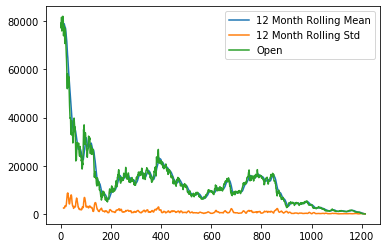

<Figure size 432x288 with 0 Axes>

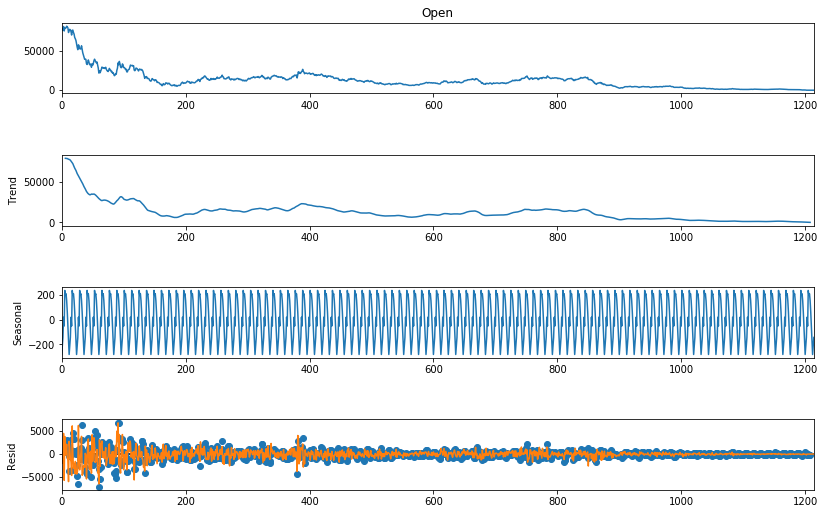

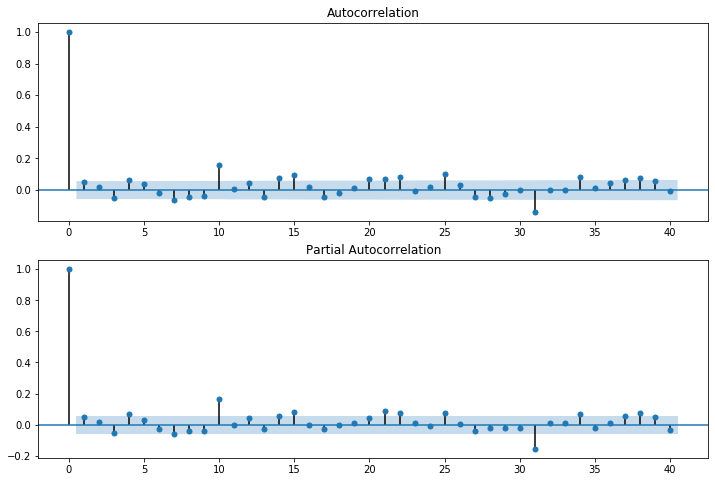

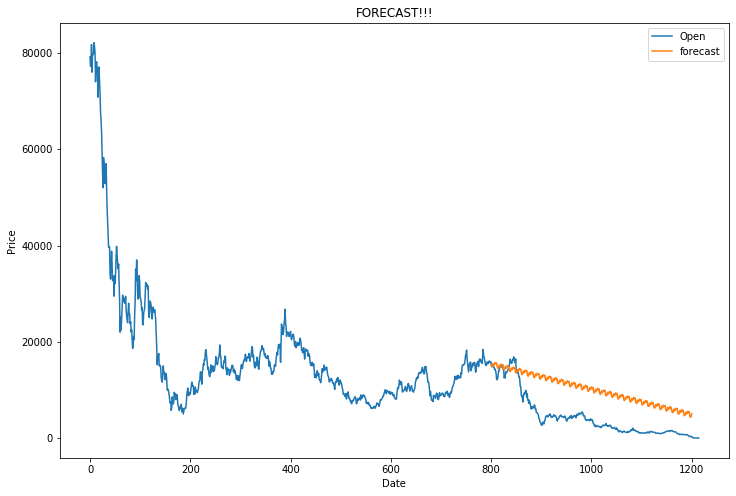

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline

#TICKER = input('Enter Ticker: ')

df1=pdr.DataReader(ticker, data_source='yahoo',start='2012-1-3')
df1.to_csv(r'C:/Users/gordo/PROGRAM/Data_Bank/NewBank/NRZ/_'+str(ticker)+'ts1.csv')
df = pd.read_csv(r'C:/Users/gordo/PROGRAM/Data_Bank/NewBank/NRZ/_'+str(ticker)+'ts1.csv')


df['Date1']=df['Date']
df.set_index('Date1')
timeseries = df['Open']


timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()


from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Open'], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(13, 8)


from statsmodels.tsa.stattools import adfuller

# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adf_check(df['Open'])

df['Open First Difference'] = df['Open'] - df['Open'].shift(1)

adf_check(df['Open First Difference'].dropna())

df['Open First Difference'].plot()
print('')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Open First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Open First Difference'].iloc[13:], lags=40, ax=ax2)


model = sm.tsa.statespace.SARIMAX(df['Open'],order=(0,1,0), seasonal_order=(0,1,0,12))             
results = model.fit()          
print(results.summary())


df['forecast'] = results.predict(start = 800, end= 1200, dynamic= True) 
df[['Open','forecast']].plot(figsize=(12,8))

plt.title('FORECAST!!!')
plt.ylabel('Price')
plt.xlabel('Date')

# BUY & SELL ORDER GENERATION:

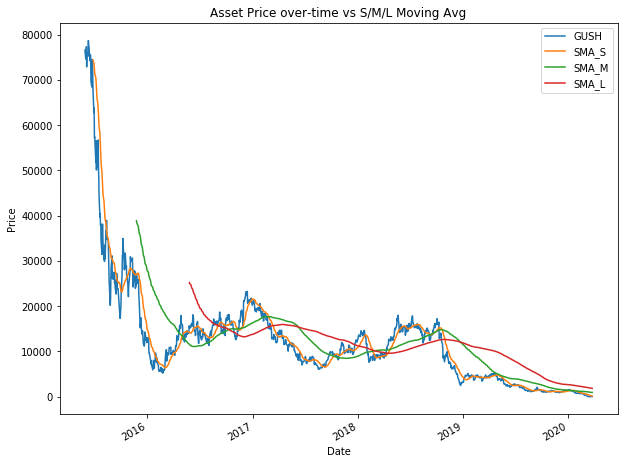

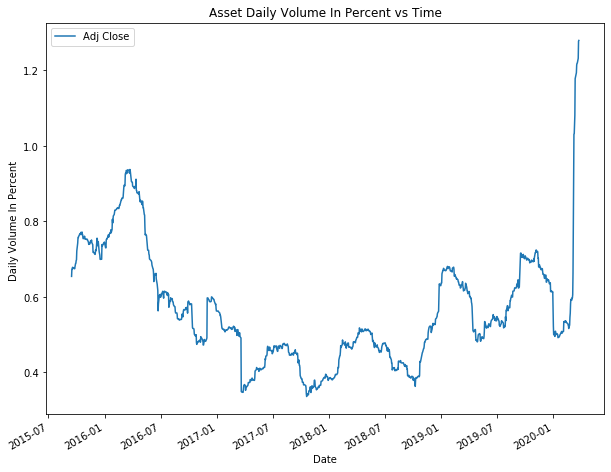

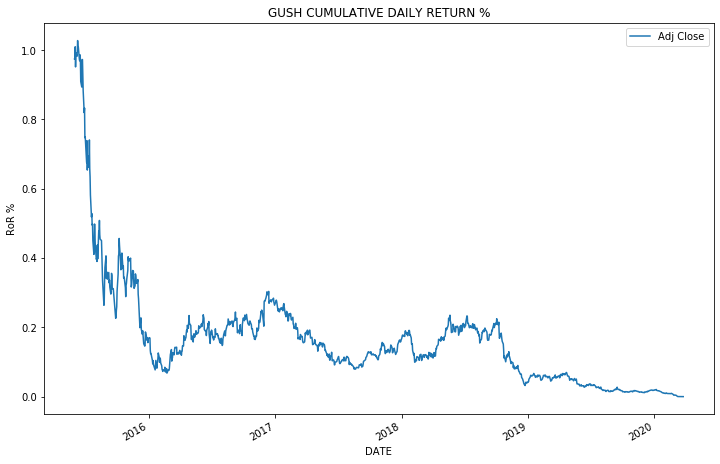

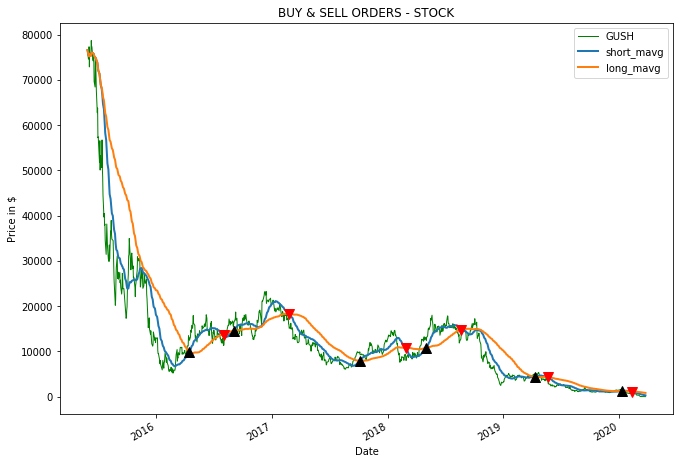

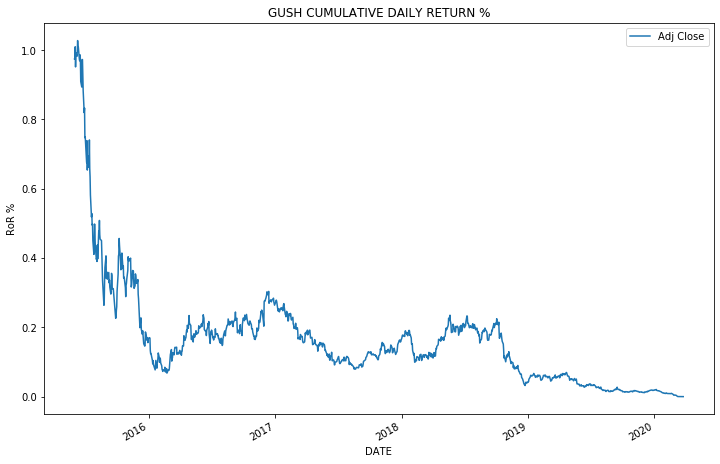

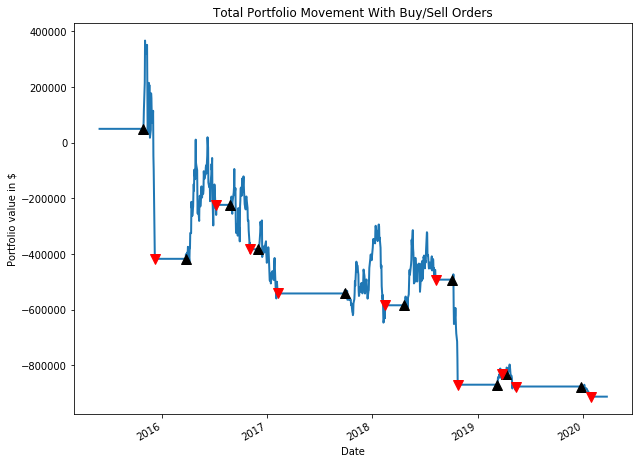

The Sharpe Ratio of GUSH = 53.76%



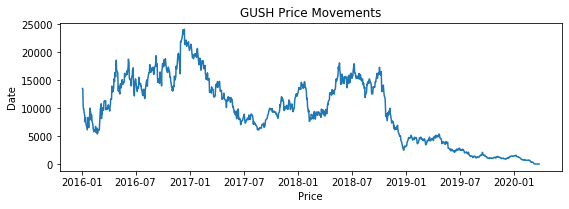

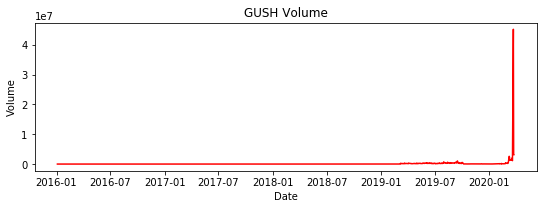

Close      Volume
Date                             
2020-03-19  16.760000   1406700.0
2020-03-20  17.120001   1144300.0
2020-03-23  13.520000  45177200.0
2020-03-24  17.900000   3331000.0
2020-03-25  18.559999   3141600.0

In [4]:
######################### BUY & SELL ORDER GENERATION:
############## Build df Columns for SMA & LMA
import quandl
import yfinance as yf
from yahoofinancials import YahooFinancials
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
import pandas as pd
import pandas_datareader as pdr


#ticker=input('Ticker: ')

start = datetime.datetime(2015,1,1)
end = datetime.date.today()

amzn = pdr.get_data_yahoo(ticker, start=start, end=end)
amzn.drop(['High','Low','Open','Close','Volume'], axis=1, inplace=True)
#amzn.head()


### Ratio Analysis
amzn_daily_close = amzn[['Adj Close']]
amzn_daily_pct_c = amzn_daily_close.pct_change()
amzn_daily_pct_c.fillna(0, inplace=True)

amzn_daily_pct_c = amzn_daily_close / amzn_daily_close.shift(1) - 1
amzn['Daily_S_RoR']=amzn_daily_pct_c['Adj Close']


### LOG Rate Of Return
amzn_daily_log_returns = np.log(amzn_daily_close.pct_change()+1)
amzn_daily_log_returns.head()
amzn['Daily_Log']=amzn_daily_log_returns['Adj Close']


### Monthly Return
monthly = amzn.resample('BM').apply(lambda x: x[-1])
#amzn['Monthly_RoR']=monthly['Adj Close']


### Quarterly Return
quarter = amzn.resample("4M").mean()
#amzn['Quarter_RoR']=quarter['Adj Close']


### Total Return
amzn_cum_daily_return = (1 + amzn_daily_pct_c).cumprod()
amzn['Total_RoR']=amzn_cum_daily_return['Adj Close']
amzn.rename(columns={'Adj Close': ticker}, inplace=True)


amzn_cum_monthly_return = amzn_cum_daily_return.resample("M").mean()
#amzn_cum_monthly_return

adj_close_px = amzn[ticker]
moving_avg = adj_close_px.rolling(window=40).mean()
#moving_avg[-10:]


amzn['SMA_S'] = adj_close_px.rolling(window=21).mean()
amzn['SMA_M'] = adj_close_px.rolling(window=126).mean()
amzn['SMA_L'] = adj_close_px.rolling(window=252).mean()

amzn[[ticker, 'SMA_S', 'SMA_M', 'SMA_L']].plot(figsize=(10, 8))
plt.ylabel('Price')
plt.title('Asset Price over-time vs S/M/L Moving Avg')

min_periods = 75 
vol = amzn_daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot(figsize=(10, 8))
plt.ylabel('Daily Volume In Percent ')
plt.title('Asset Daily Volume In Percent vs Time')

amzn_cum_daily_return.plot(figsize=(12,8))
plt.title(str(ticker)+' CUMULATIVE DAILY RETURN %')
plt.xlabel('DATE')
plt.ylabel('RoR %')

plt.show()
amzn.tail()

############################################################### Build df Columns for SMA & LMA
short_window = 30
long_window = 90
signals = pd.DataFrame(index=amzn.index)
signals['signal'] = 0.0
signals['short_mavg'] = amzn[ticker].rolling(window=short_window,
                                              min_periods=1, 
                                              center=False).mean()
signals['long_mavg'] = amzn[ticker].rolling(window=long_window, 
                                             min_periods=1, 
                                             center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 
                                            1.0, 0.0) 
signals['positions'] = signals['signal'].diff()


### SIGNALS
signals=signals.replace({'signal': {1.0: 'Buy', 0.0: 'Sell'}})
signals['count']=signals.loc[signals.signal == 'Buy', ['count']] = 1.0
signals['count']=signals.loc[signals.signal == 'Sell', ['count']] = -1.0


### .............
fig = plt.figure(figsize=(11, 8))
ax1 = fig.add_subplot(111,  ylabel='Price in $')

amzn[ticker].plot(ax=ax1, color='g', lw=1)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='k')
         
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='r')

plt.title('BUY & SELL ORDERS - STOCK')
plt.legend()
plt.show()

signals.tail()

######################################################## Evaluate Short Moving Average(SMA) vs Long Moving Average
short_window = 21
long_window = 63
signals = pd.DataFrame(index=amzn.index)
signals['signal'] = 0.0
signals['short_mavg'] = amzn[ticker].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = amzn[ticker].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0) 
signals['positions'] = signals['signal'].diff()


## Set Portfolio 
initial_capital= float(50000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['stock'] = 50*signals['signal']   
portfolio = positions.multiply(amzn[ticker], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(amzn[ticker],
                                            axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital -(pos_diff.multiply(amzn[ticker],
                                                        axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()


### SHARPE RATIO
returns = portfolio['returns']
portfolio_ror=np.sqrt(252) * (returns.mean() / returns.std())


### CONSTRUCT ORDERS
amzn_cum_daily_return.plot(figsize=(12,8))
plt.title(str(ticker)+' CUMULATIVE DAILY RETURN %')
plt.xlabel('DATE')
plt.ylabel('RoR %')

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='k')

ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='r')

plt.title('Total Portfolio Movement With Buy/Sell Orders')
plt.show()

print ("The Sharpe Ratio of "+ticker+" = "+"{0:.2%}".format(portfolio_ror))
print('')
portfolio.tail()


############################################################ Demo
import quandl
import yfinance as yf
from yahoofinancials import YahooFinancials
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas_datareader as pdr


### ............
ticker=ticker
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

amzn = pdr.get_data_yahoo(ticker, 
                          start=start,
                          end=end)
amzn.drop(['High','Low','Open','Adj Close'],
          axis=1, inplace=True)


### ...........
fig = plt.figure(figsize=(9,6))
plt.subplot(211)
plt.plot(amzn['Close'])
plt.title(str(ticker)+' Price Movements')
plt.ylabel('Date')
plt.xlabel('Price')
plt.show()

fig = plt.figure(figsize=(9,6))
plt.subplot(212)
plt.plot(amzn['Volume'], color='r')
plt.title(str(ticker)+' Volume')
plt.ylabel('Volume')
plt.xlabel('Date')

plt.show()
amzn.tail()



# Monte Carlo Simulations

[*********************100%***********************]  1 of 1 completed
Downloaded 306 rows of data.


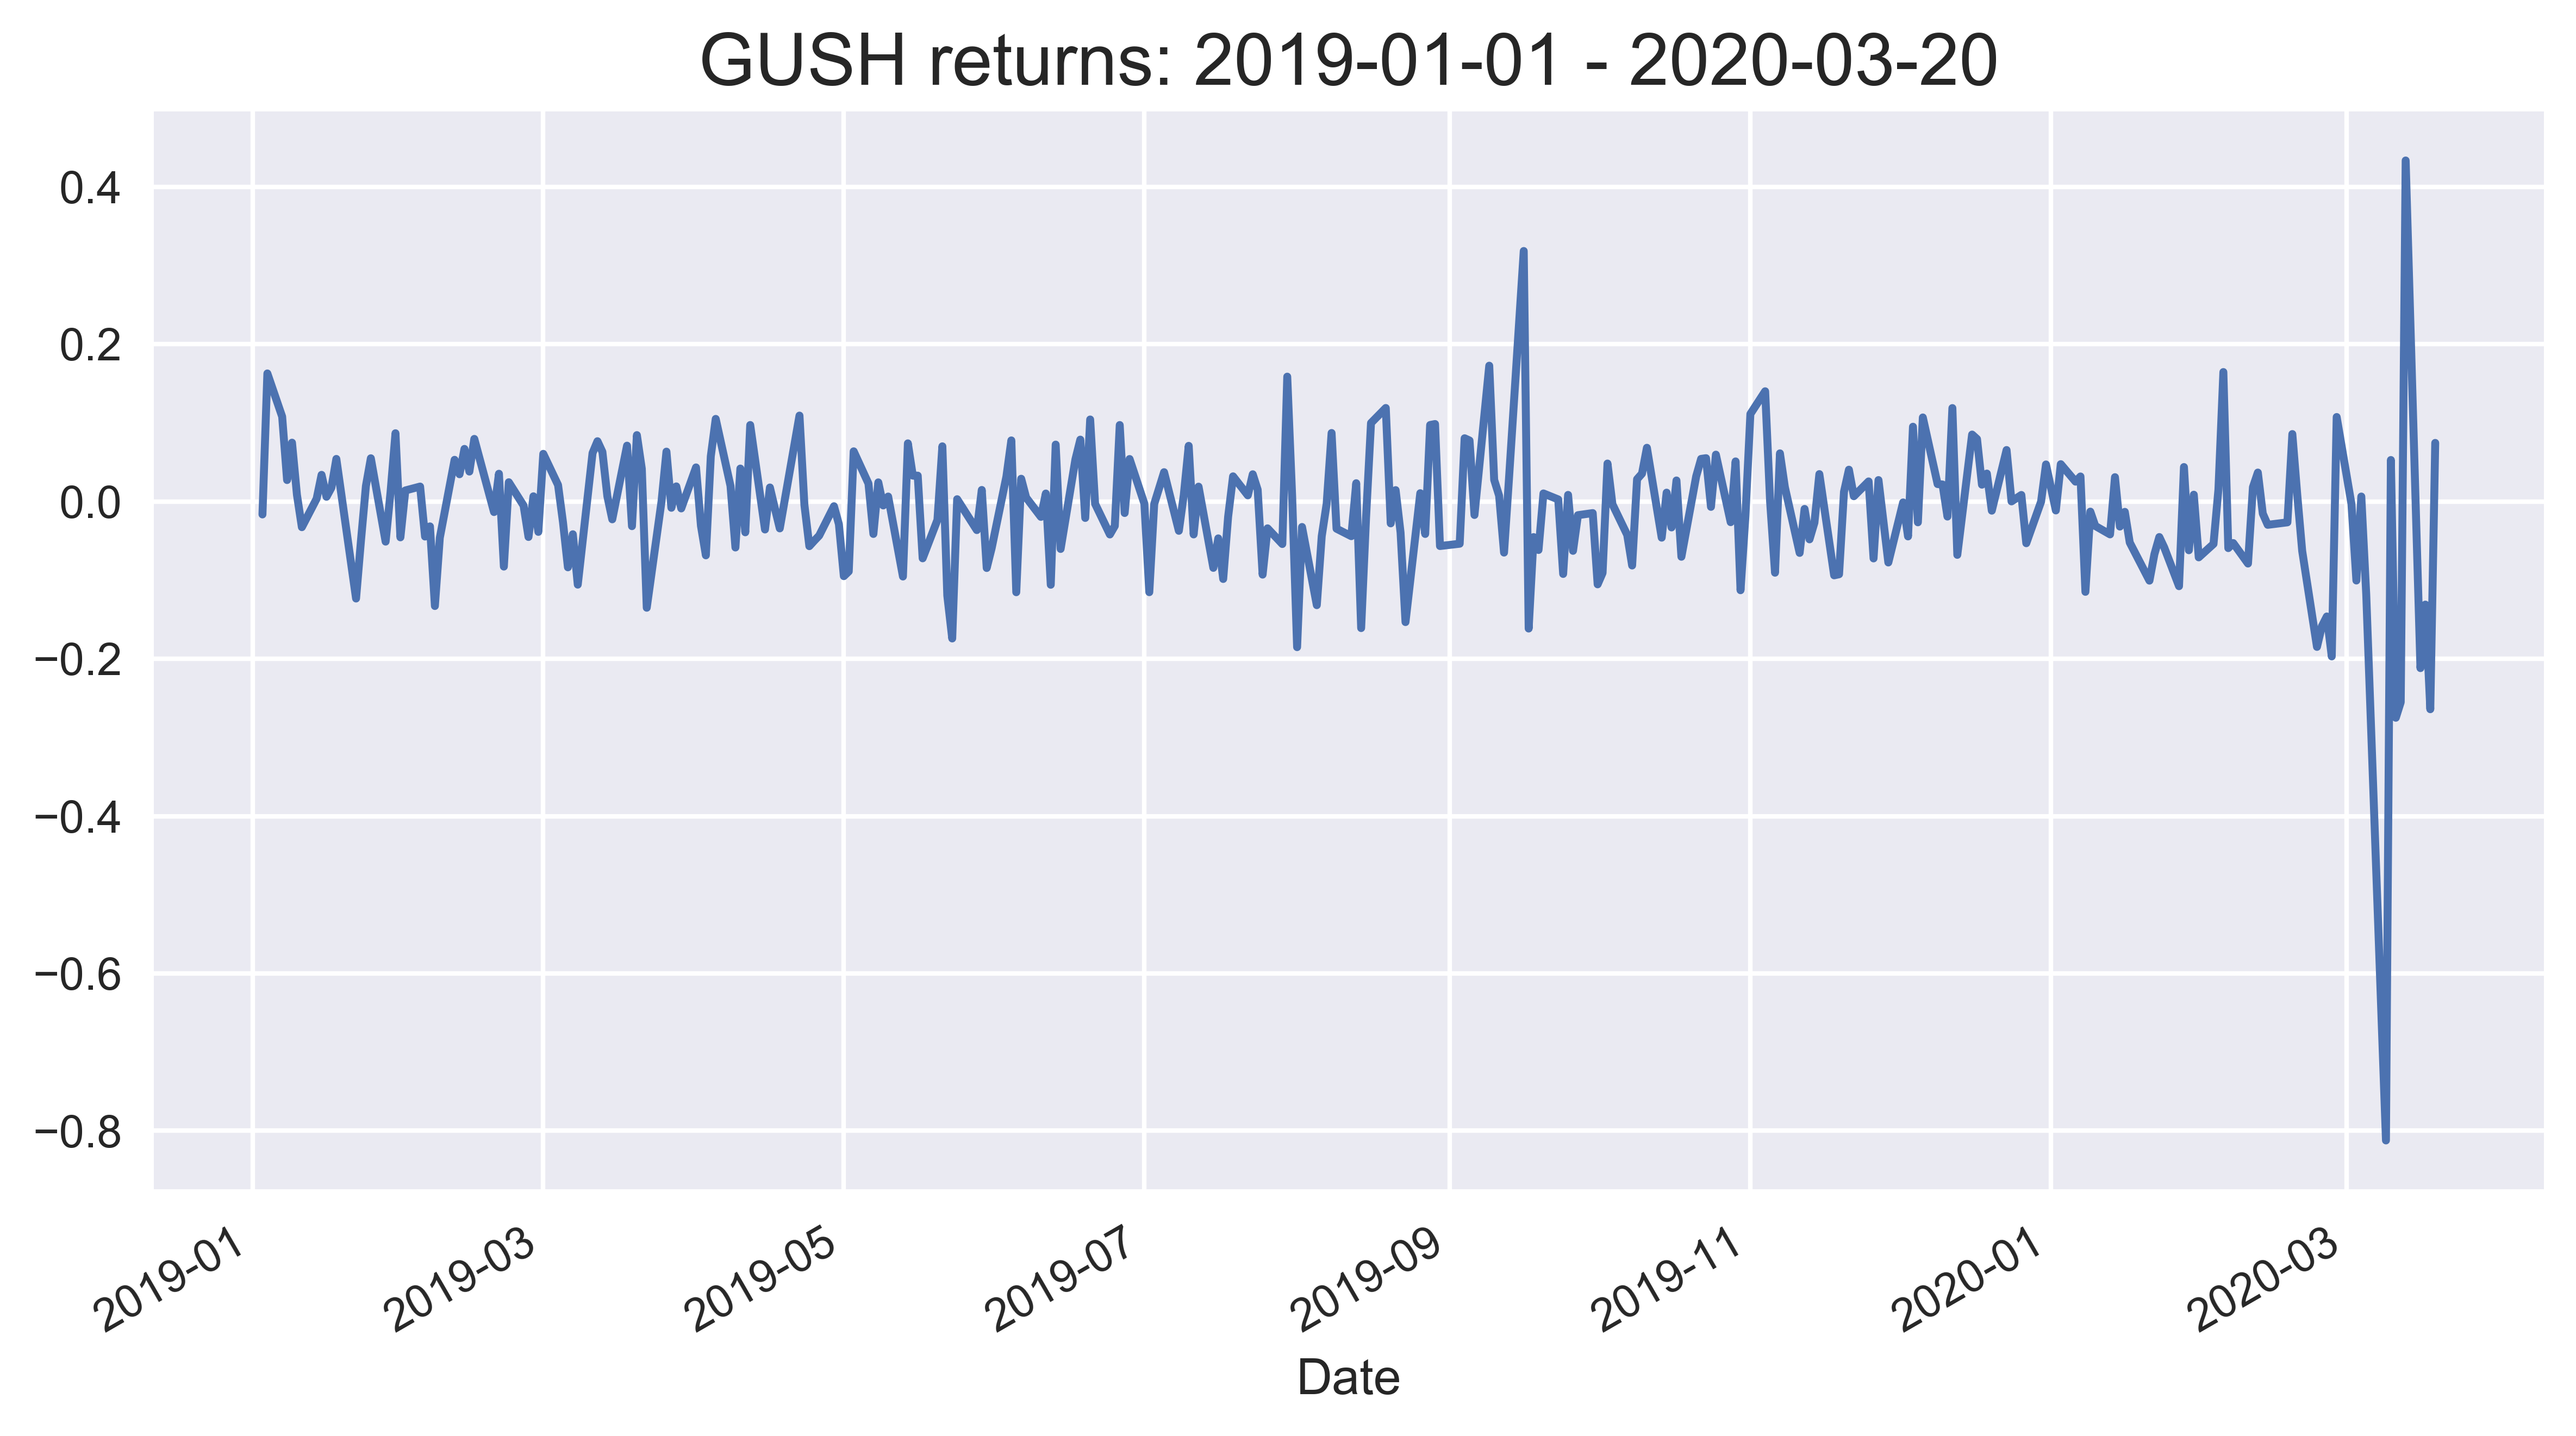

Average return: -1.13%


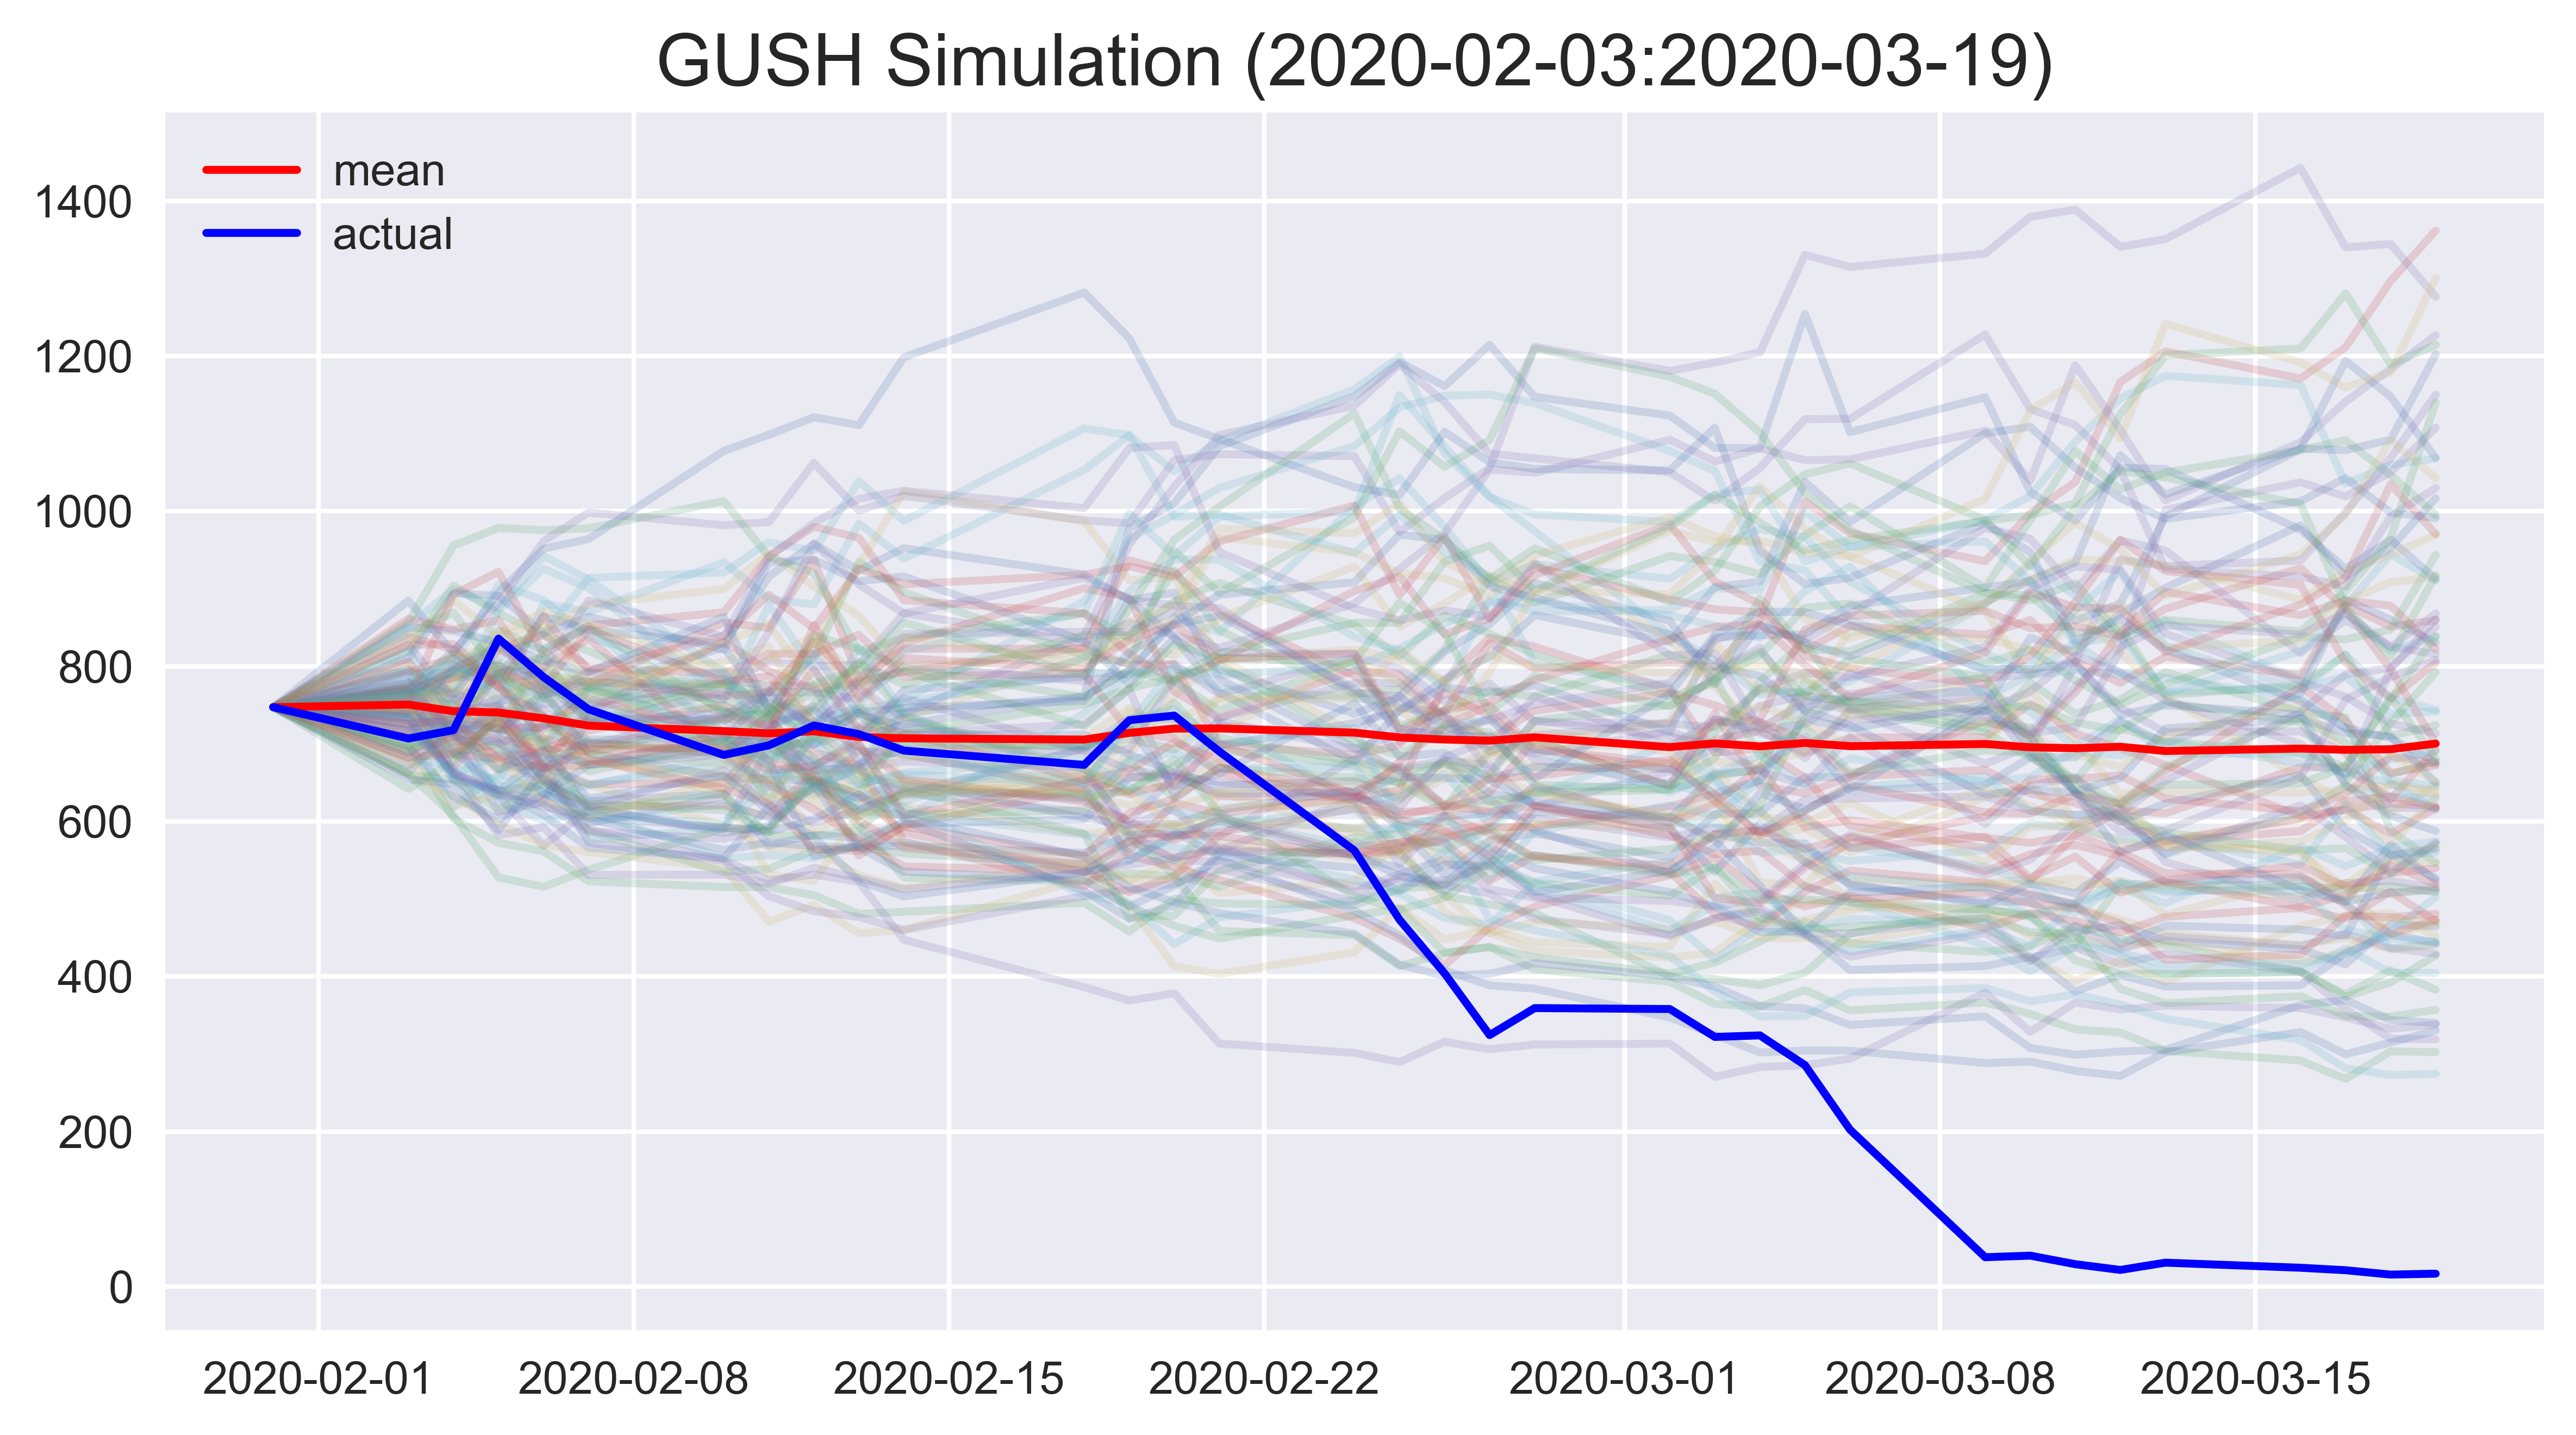

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import yfinance as yf


### 2. Define parameters for downloading data:
#RISKY_ASSET = input('Enter Asset: ')
START_DATE = '2019-01-01'
END_DATE = '2020-03-20'


### 3. Download data from Yahoo Finance:
df = yf.download(ticker, start=START_DATE, 
                 end=END_DATE, adjusted=True)
print(f'Downloaded {df.shape[0]} rows of data.')


### 4. Calculate daily returns:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()

ax = returns.plot()
ax.set_title(f'{ticker} returns: {START_DATE} - {END_DATE}', 
             fontsize=16)

plt.tight_layout()
#plt.savefig(r'C:/Users/Gordon D. Pisciotta/OneDrive/Desktop/NOTEBOOKS/temp/images/ch6_im1.png')
plt.show()

print(f'Average return: {100 * returns.mean():.2f}%')


### 5. Split data into the training and test sets:
train = returns['2019-01-01':'2020-01-31']
test = returns['2020-02-01':'2030-03-20']


### 6. Specify the parameters of the simulation:
T = len(test)
N = len(test)
S_0 = adj_close[train.index[-1].date()]
N_SIM = 100
mu = train.mean()
sigma = train.std()



### 7. Define the function used for simulations:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, 
                 random_seed=42):
    '''
    Function used for simulating stock returns using Geometric Brownian Motion.
    
    Parameters
    ------------
    s_0 : float
        Initial stock price
    mu : float
        Drift coefficient
    sigma : float
        Diffusion coefficient
    n_sims : int
        Number of simulations paths
    dt : float
        Time increment, most commonly a day
    T : float
        Length of the forecast horizon, same unit as dt
    N : int
        Number of time increments in the forecast horizon
    random_seed : int
        Random seed for reproducibility

    Returns
    -----------
    S_t : np.ndarray
        Matrix (size: n_sims x (T+1)) containing the simulation results. 
        Rows respresent sample paths, while columns point of time.
    '''
    np.random.seed(random_seed)
    
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps 
                       + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    
    return S_t


### 8. Run the simulations:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)


### 9. Plot simulation results:
# prepare objects for plotting 
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{ticker} Simulation '
              f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), 
                                  index=index)

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()
#plt.savefig(r'C:/Users/Gordon D. Pisciotta/OneDrive/Desktop/NOTEBOOKS/temp/images/ch6_im2.png')
plt.show()

# Visualization and Analysis

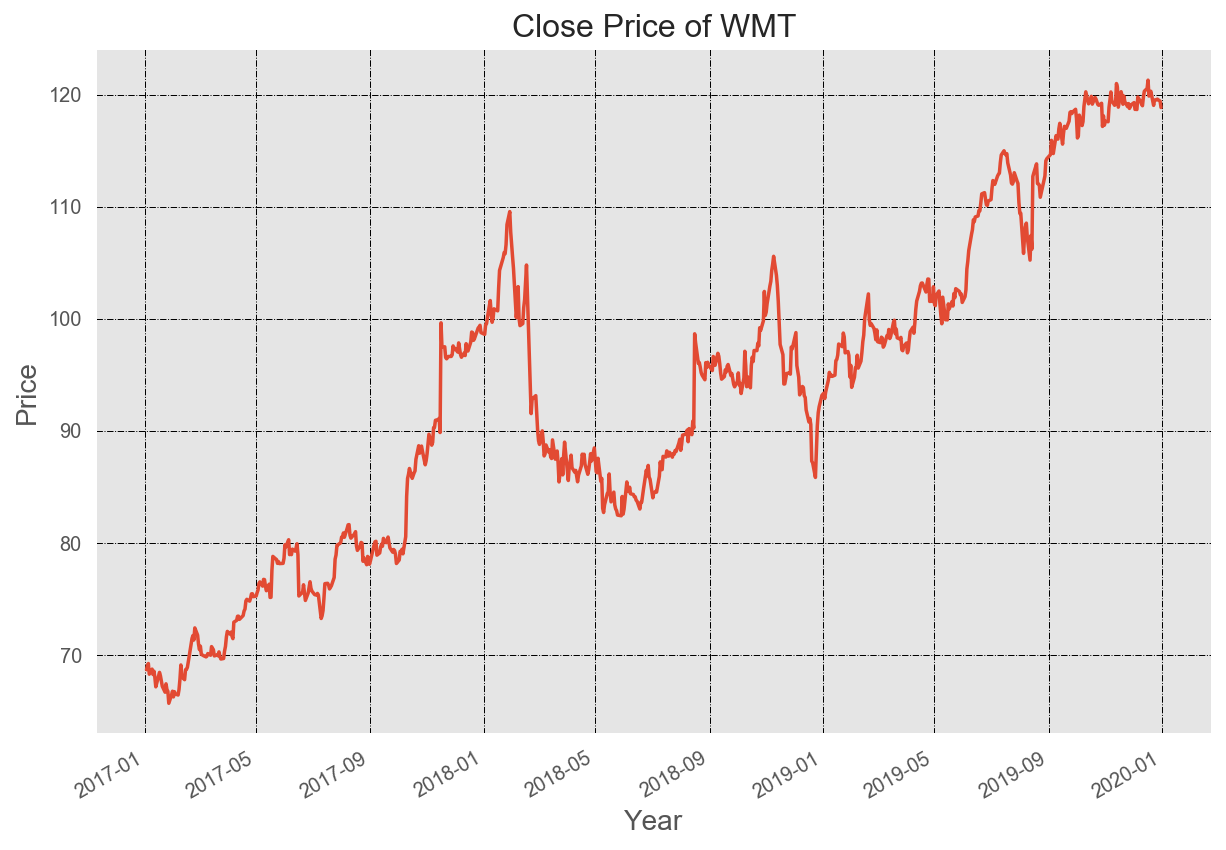

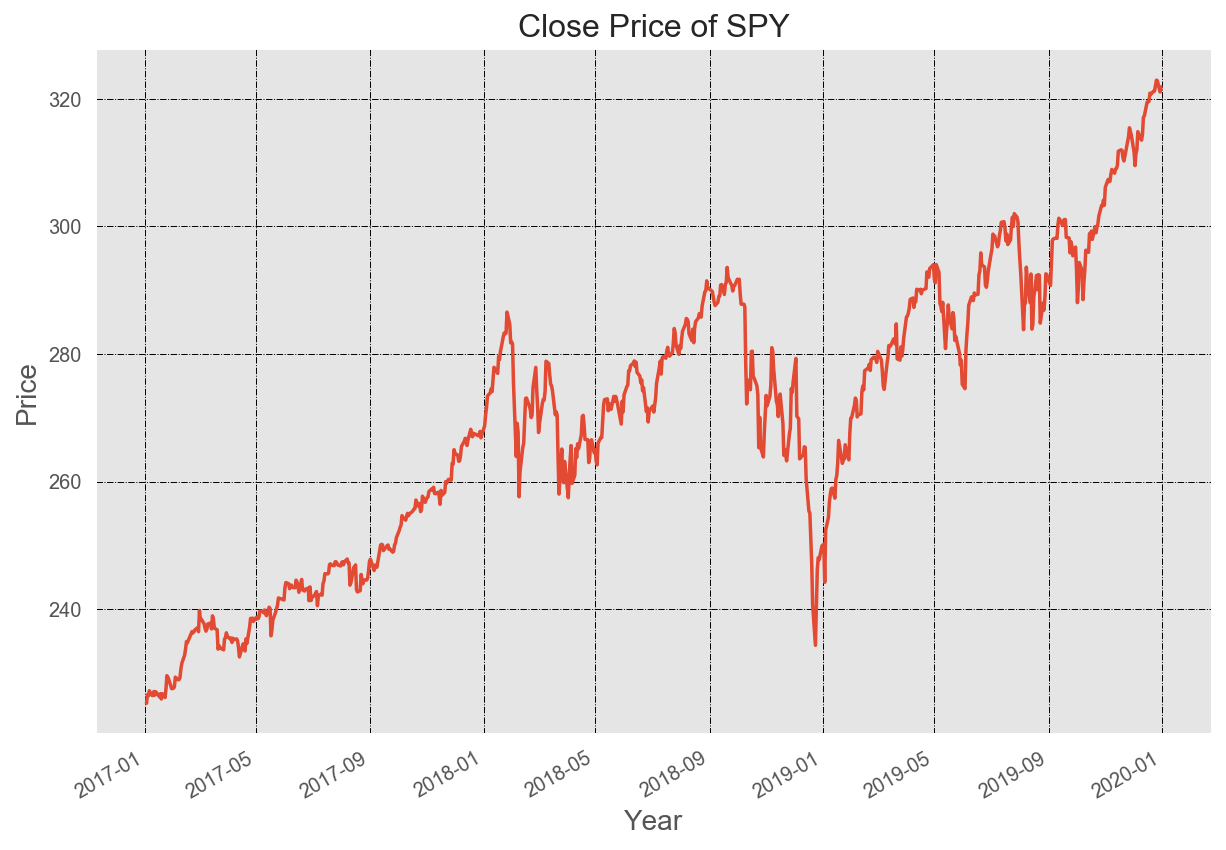

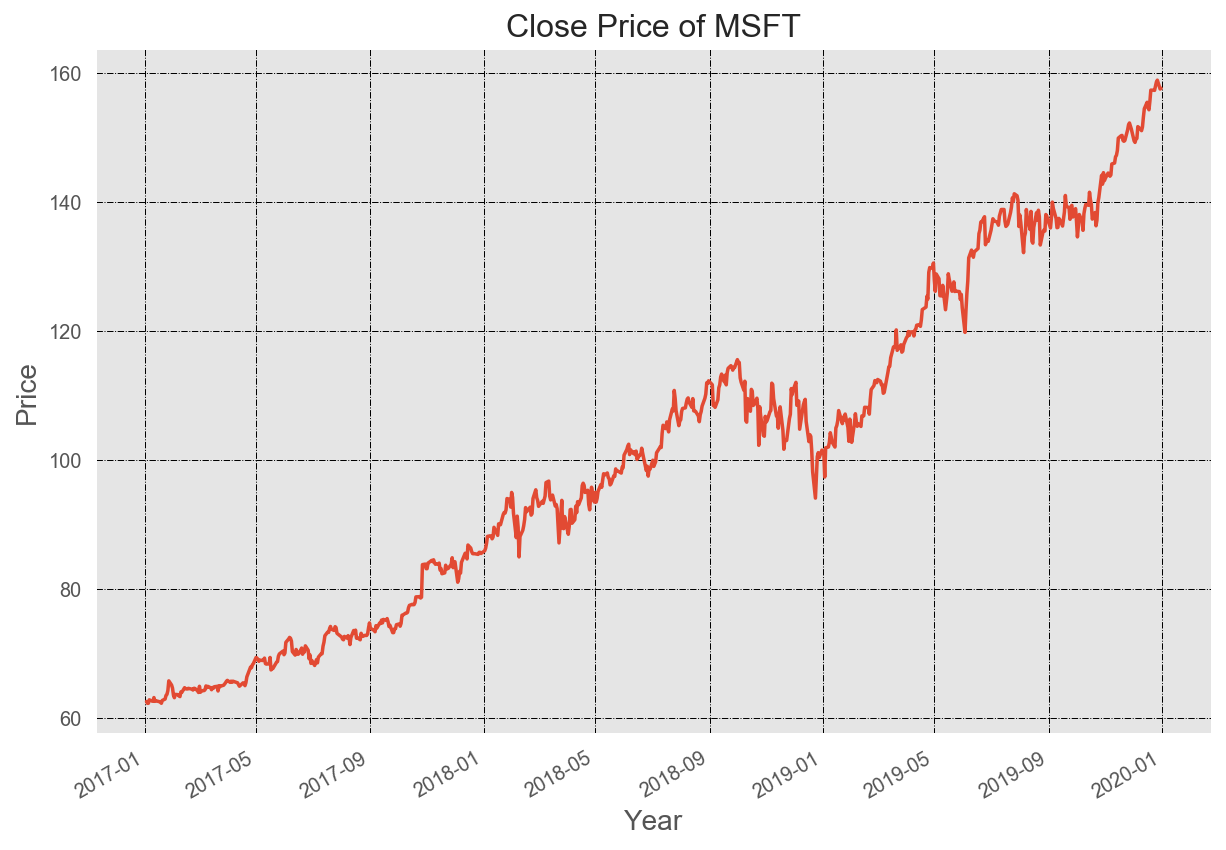

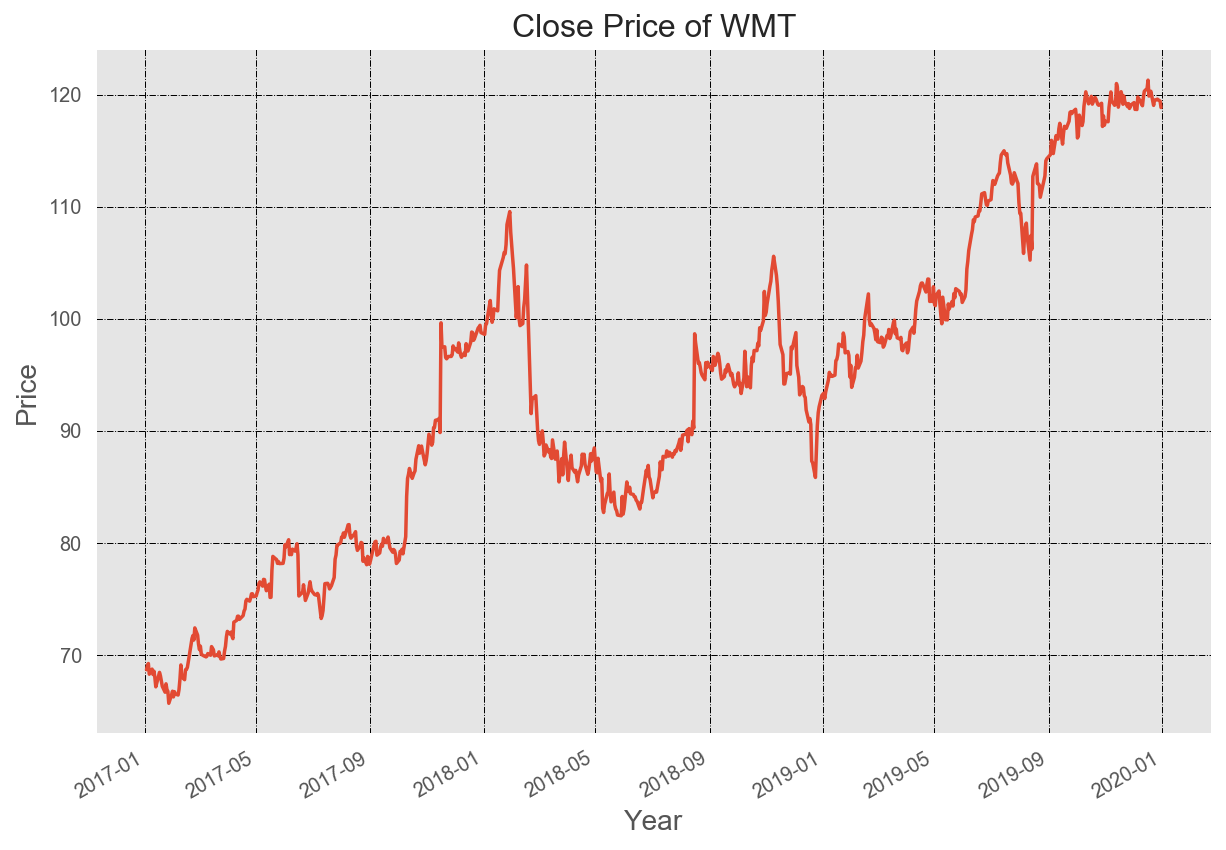

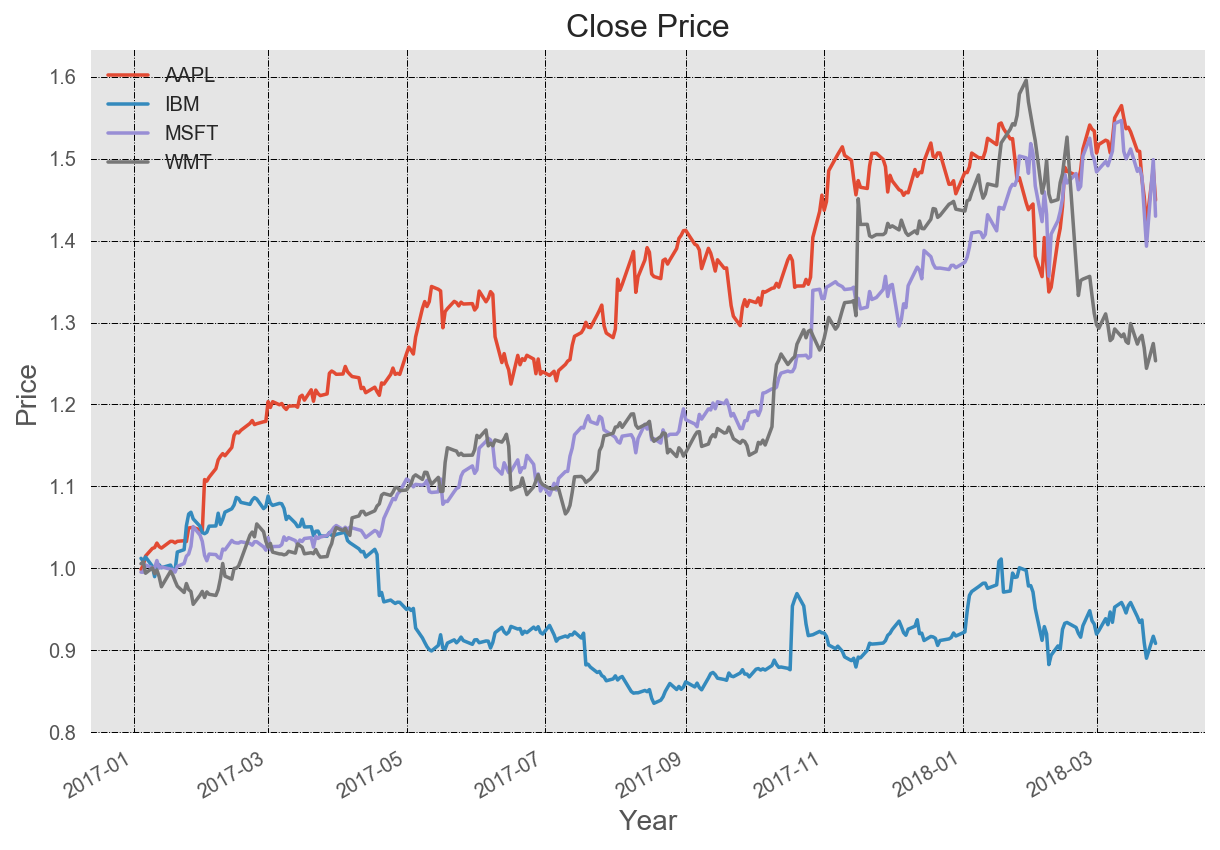

7.221177338357461
9.005745940592629
9.389549555943391
7.221177338357461
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
comp         0
dtype: int64
High --------- 0
Low --------- 0
Open --------- 0
Close --------- 0
Volume --------- 88
Adj Close --------- 0
Highly Correlated Variables
Stock forcast for Walmart  using LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


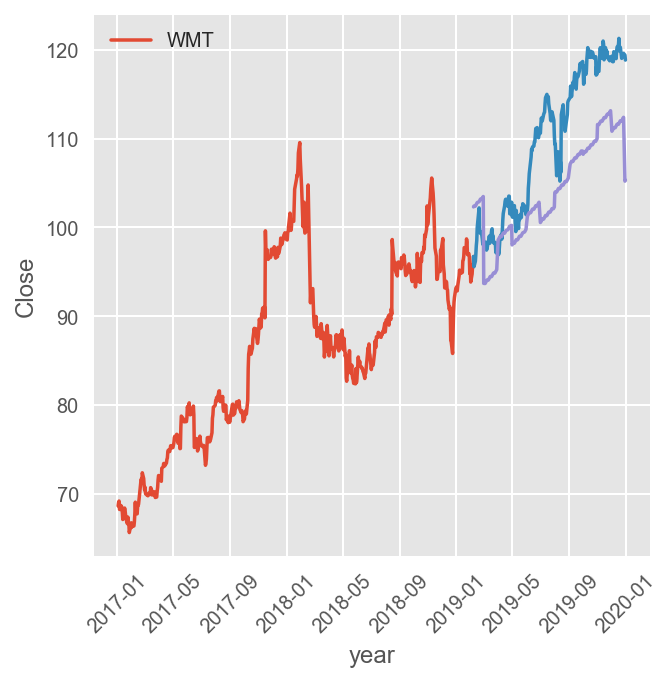

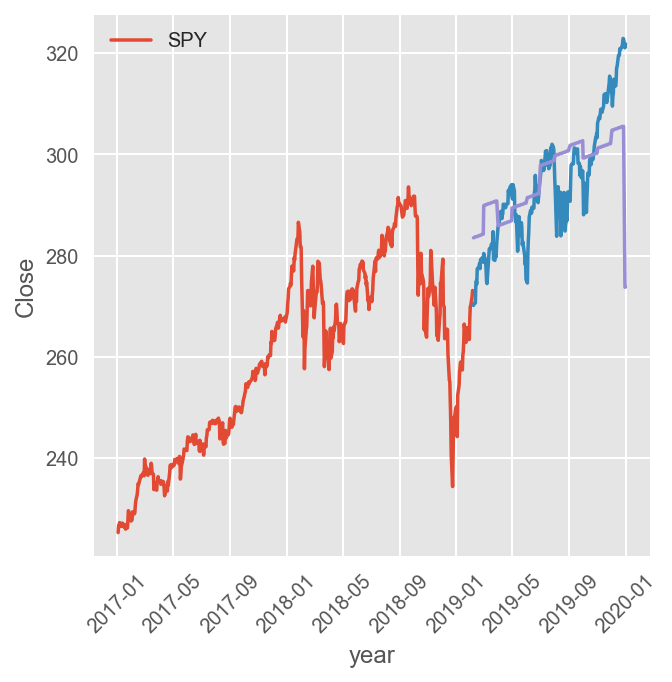

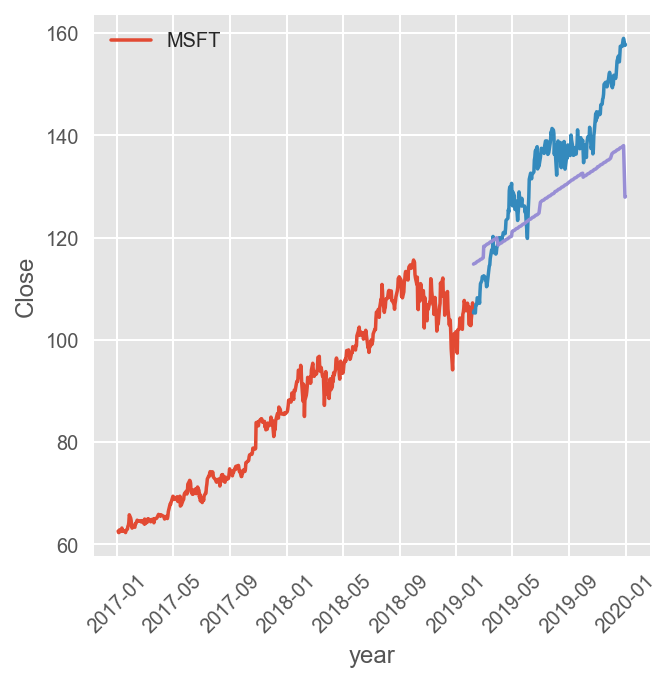

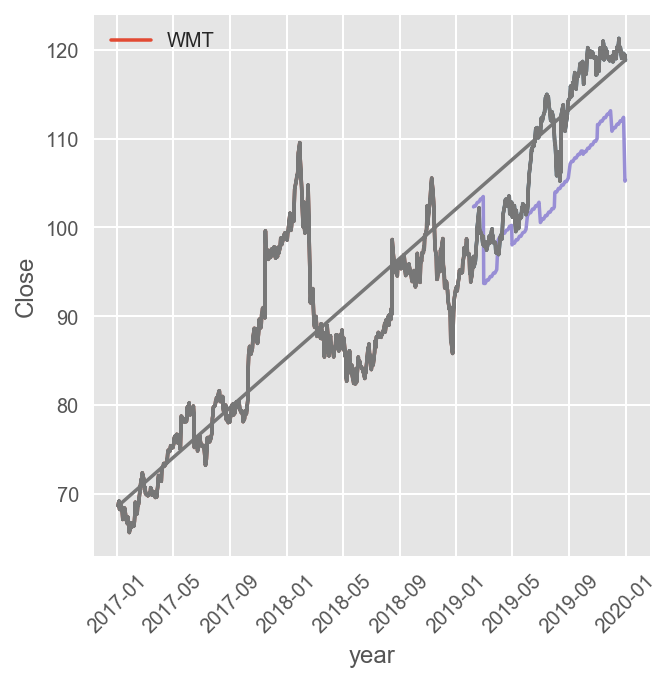

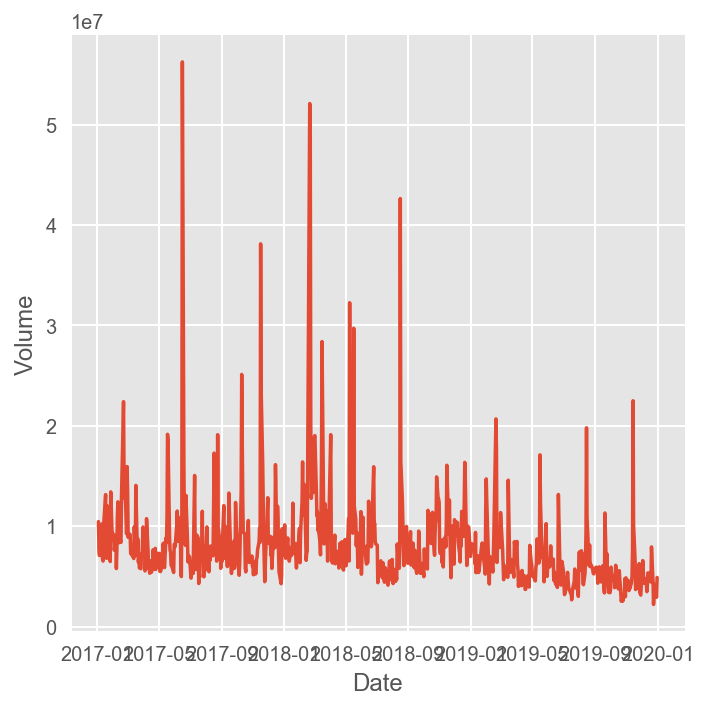

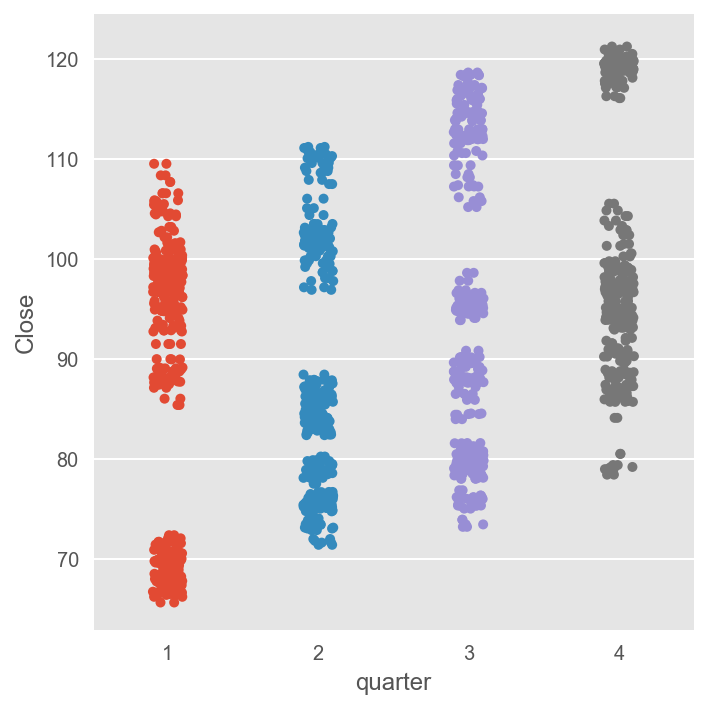

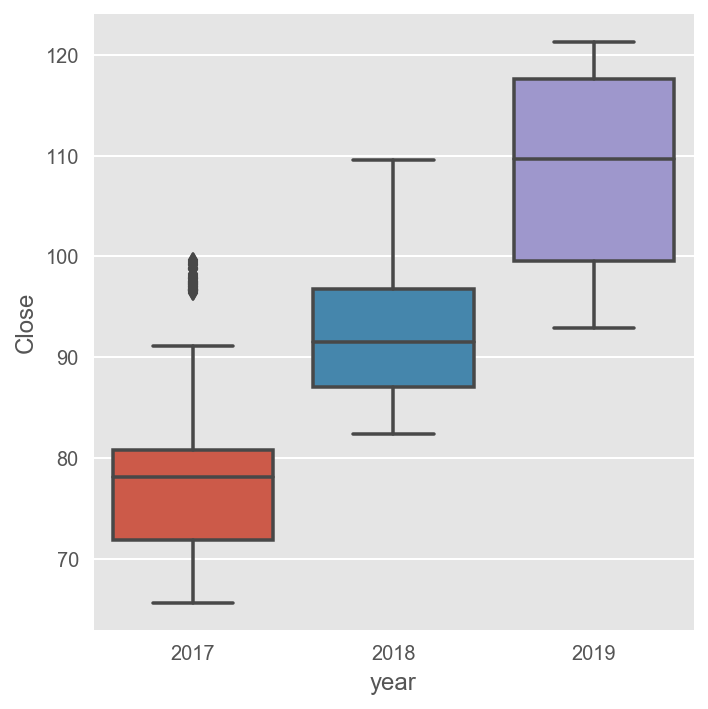

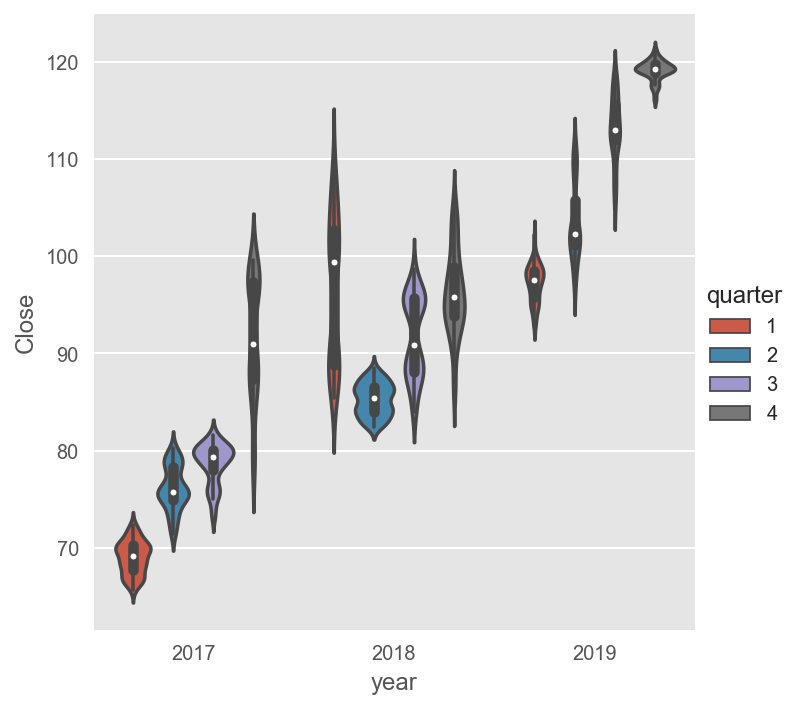

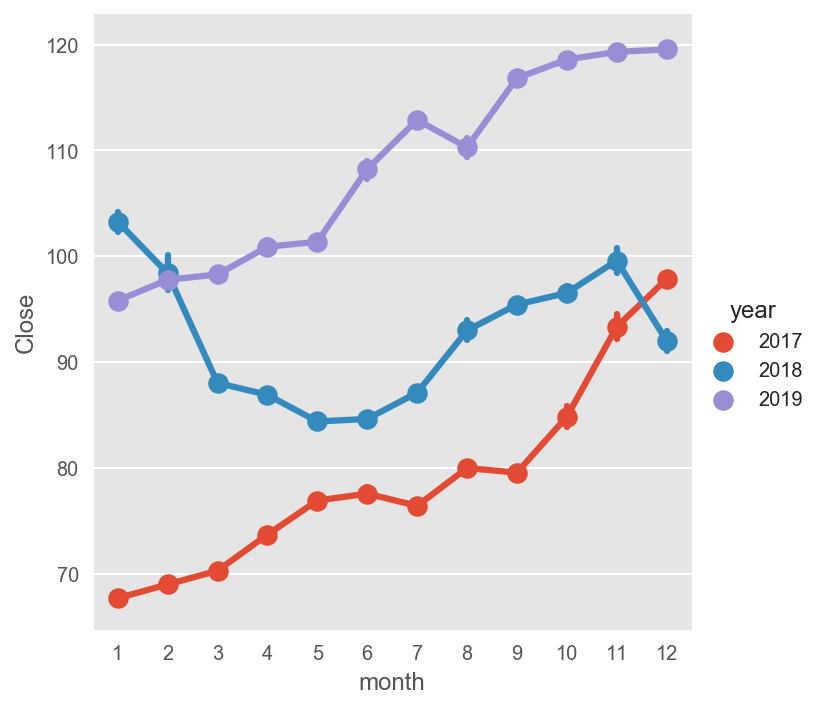

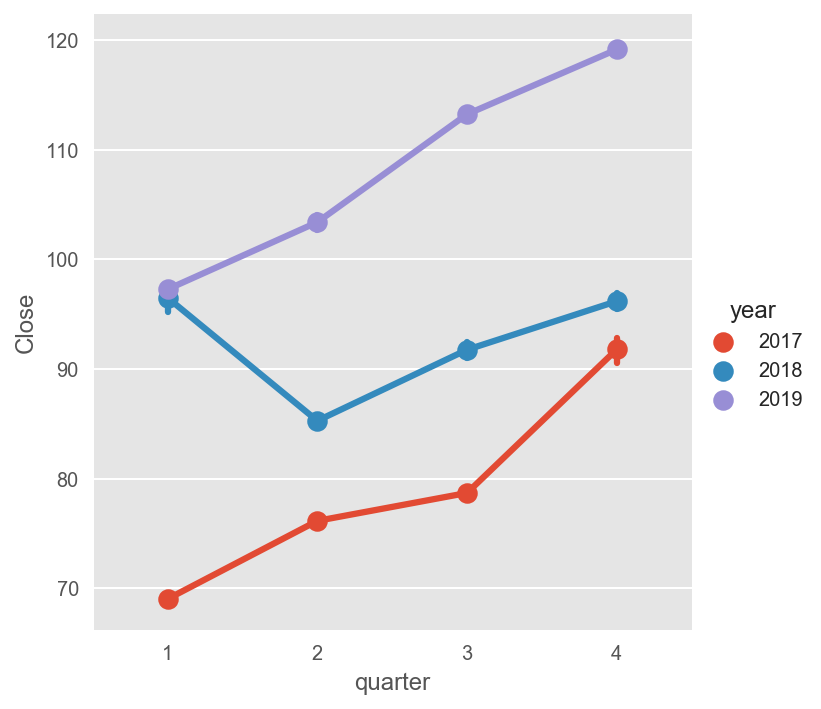

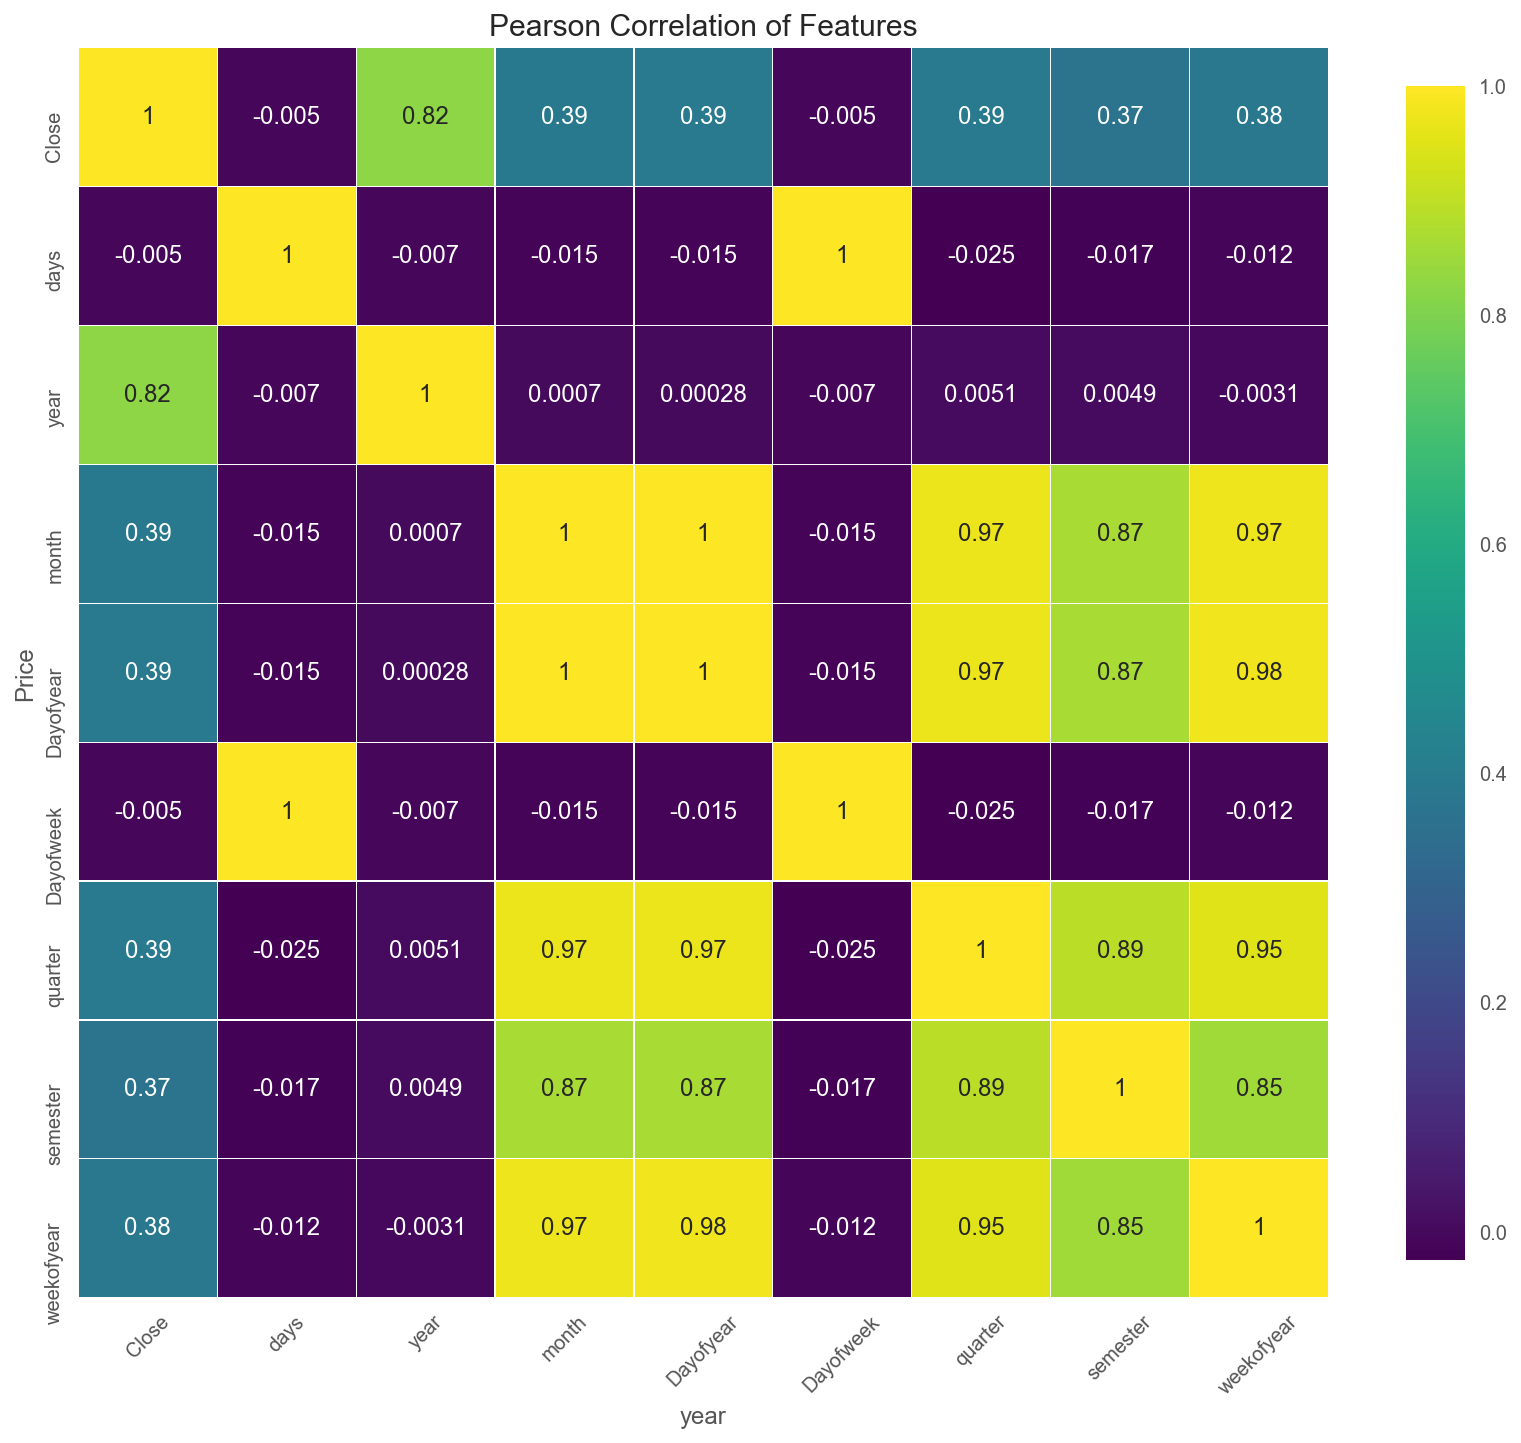

Stock forcast for Walmart  using SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


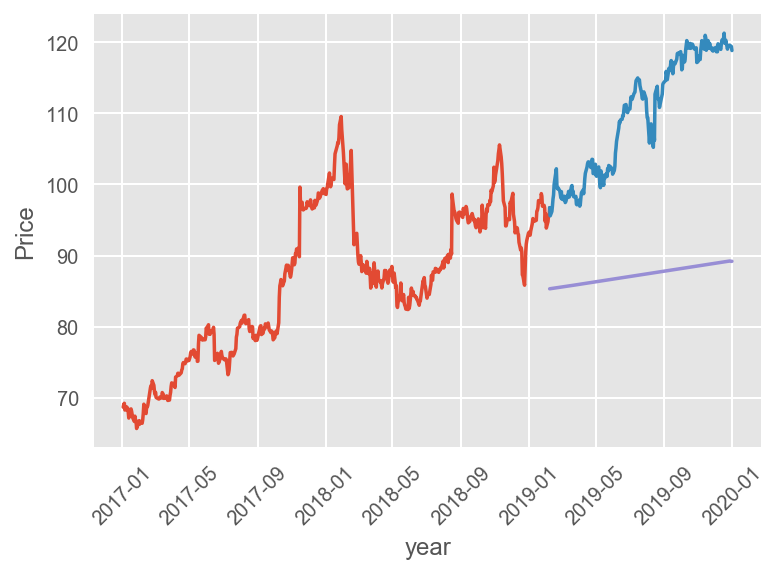

Features  to be selected for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
['days', 'year', 'month', 'Dayofyear', 'Dayofweek', 'quarter', 'semester', 'weekofyear']
Features  to be selected for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
['days', 'year', 'month', 'Dayofyear', 'Dayofweek', 'quarter', 'semester', 'weekofyear']
r2 / variance :  -2.6384023641310677
Residual sum of squares: 39.79


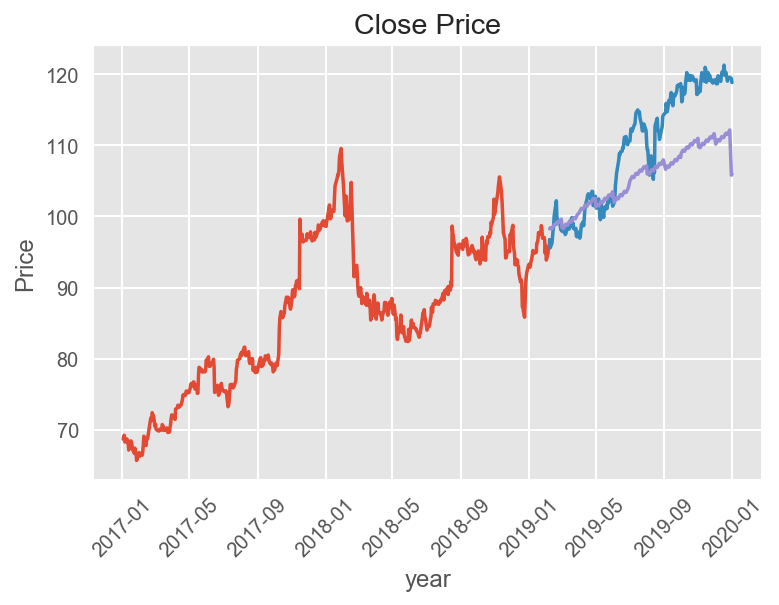

In [24]:
############################################################################################################################

#Importing Libraries
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import numpy as np
import quandl
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

############################################################################################################################

#Declaring Start Date and End Date
style.use('ggplot')
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2019,12,31)

############################################################################################################################

##scraping stock data of company using yahoo finance(cna use google or morning star)
def comp_scraper(company_name):
    df=web.DataReader(company_name, 'yahoo', start, end)
    df['comp']=company_name
    return (df)

data_df=pd.DataFrame()

############################################################################################################################

#Data scraping for Apple,IBM,Microsoft,Walmart
company_list=[ticker, 'SPY', 'MSFT', 'WMT']
for company in company_list:
    df=comp_scraper(company)
    data_df=data_df.append(df)
    
############################################################################################################################

#plotting close price of each company for Analysis
for company in company_list:
    
    x=data_df[data_df['comp']==company]
    x['Close'].plot(figsize=(10, 7))
# Define the label for the title of the figure
    plt.title("Close Price of %s" % company, fontsize=16)
# Define the labels for x-axis and y-axis
    plt.ylabel('Price', fontsize=14)
    plt.xlabel('Year', fontsize=14)# Plot the grid lines
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
    plt.show()
    
############################################################################################################################

#fetch data from quandl API
# Define the ticker list
import pandas as pd
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']
# Import pandas
data = pd.DataFrame(columns=tickers_list)
# Feth the data
for ticker in tickers_list:
    data[ticker] = quandl.get('WIKI/' + ticker, start_date=start,
    end_date=end, api_key='YfzxefERAEGTD3SgYuXo')['Close']
# Print first 5 rows of the data
data

############################################################################################################################

((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
#plt.title(“Adjusted Close Price”, fontsize=16)
# Define the labels for x-axis and y-axis
#plt.ylabel(‘Price’, fontsize=14)
#plt.xlabel(‘Year’, fontsize=14)
# Plot the grid lines
#plt.grid(which=”major”, color=’k’, linestyle=’-.’, linewidth=0.5)
plt.title("Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

############################################################################################################################
#### function to predict stock for each company########

def predict(company_name):
    data_comp=data_df[data_df['comp']==company_name]
    data = data_comp.sort_index(ascending=True, axis=0)
    data['Date']=data.index
#creating a separate dataset
    new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]
    ###creating features
    new_data.index=new_data['Date']
    new_data['days']=new_data['Date'].apply(lambda x:x.weekday())

    new_data['year']=new_data['Date'].apply(lambda x:x.year)

    new_data['month']=new_data['Date'].apply(lambda x:x.month)
    new_data['day']=new_data['Date'].apply(lambda x:x.day)
    new_data['Dayofyear']=new_data['Date'].apply(lambda x:x.dayofyear)
    #new_data['Dayofweek']=new_data['Date'].apply(lambda x:x.dayofweek)


    new_data['quarter']=new_data['Date'].apply(lambda x:x.quarter)

    new_data['semester'] = np.where(new_data.quarter.isin([1,2]),1,2)
    new_data['weekofyear']=new_data['Date'].apply(lambda x:x.weekofyear)
    new_data.drop("Date",1,inplace=True)
    x=int(0.7*len(new_data))
    train = new_data[:x]
    valid = new_data[x:]

    x_train = train.drop('Close', axis=1)
    y_train = train['Close']
    x_valid = valid.drop('Close', axis=1)
    y_valid = valid['Close']

#implement linear regression
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print(rms)
    valid['Predictions'] = 0
    valid['Predictions'] = preds
    valid.index = new_data[x:].index
    train.index = new_data[:x].index
    plt.figure(figsize=(5,5))
    plt.plot(train['Close'],label=company_name)
    plt.plot(valid[['Close', 'Predictions']])
    plt.xlabel("year")
    plt.ylabel("Close")
    plt.xticks(rotation=45)
    plt.legend()

############################################################################################################################

for company in company_list:
    predict(company)
    
############################################################################################################################
####Applying models on Walmart stock data

df_WMT=data_df[data_df['comp']=='WMT']

############################################################################################################################

def fill_null_values(dataset, value):
    nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
    nulls = nulls[nulls>0]
    nulls.columns = ['Null Count']
    nulls.index.name = 'Feature'
    nulls

    for column in nulls[nulls["Null Count"]> 0].index:
        if dataset[column].dtype == np.number and value == 0:
            dataset[column].fillna(dataset[column].mean(), inplace = True)
        elif value == 1:
            dataset[column].fillna(dataset[column].median(), inplace = True)
        else:
            dataset[column].fillna("NA", inplace = True)
    print(dataset.isnull().sum())
    return dataset

predictors=fill_null_values(df_WMT,0)

############################################################################################################################
##plotting close price

plt.plot(df_WMT['Close'])
plt.xticks(rotation=45)

############################################################################################################################
### Outlier Detection### will not replace or remove Outlier as their may be some reason or event...

def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(df_WMT)

############################################################################################################################

df_WMT['Date']=df_WMT.index

############################################################################################################################

sns.relplot(x='Date', y="Volume",kind="line", data=df_WMT)

############################################################################################################################
###Feature Creation using date, dropping all other columns

data = df_WMT.sort_index(ascending=True, axis=0)
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    ###creating features
new_data['days']=new_data['Date'].apply(lambda x:x.weekday())
new_data['year']=new_data['Date'].apply(lambda x:x.year)
new_data['month']=new_data['Date'].apply(lambda x:x.month)
#new_data['day']=new_data['Date'].apply(lambda x:x.day)
new_data['Dayofyear']=new_data['Date'].apply(lambda x:x.dayofyear)
new_data['Dayofweek']=new_data['Date'].apply(lambda x:x.dayofweek)
new_data['quarter']=new_data['Date'].apply(lambda x:x.quarter)
new_data['semester'] = np.where(new_data.quarter.isin([1,2]),1,2)
new_data['weekofyear']=new_data['Date'].apply(lambda x:x.weekofyear)
#new_data.drop("Date",1,inplace=True)

############################################################################################################################

sns.catplot(x='quarter', y="Close", data=new_data)

############################################################################################################################

new_data['Close']=new_data['Close'].astype(float)
sns.catplot(x="year", y="Close", kind="box", data=new_data)

############################################################################################################################
###outliers in year 2017###

sns.catplot(x="year", y="Close", hue="quarter",
            kind="violin", data=new_data)
sns.catplot(x="month", y="Close", hue="year", kind="point", data=new_data)
sns.catplot(x="quarter", y="Close", hue="year", kind="point", data=new_data)

############################################################################################################################

new_data=new_data.set_index("Date")

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(new_data)

############################################################################################################################
### Baseline Model


def run_model(dataframe, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    dataframe=dataframe.sort_index(ascending=True, axis=0)
    x=int(0.7*len(dataframe))
    train = dataframe[:x]
    valid = dataframe[x:]

    x_train = train.drop('Close', axis=1)
    y_train = train['Close']
    x_valid = valid.drop('Close', axis=1)
    y_valid = valid['Close']
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    valid['Predictions'] = 0
    valid['Predictions'] = preds
    valid.index = dataframe[x:].index
    train.index = dataframe[:x].index
    
   
    print("Stock forcast for Walmart  using "+str(model))
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel("year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    #plt.legend()
    plt.show()
    
###Applying Models
models = [LinearRegression,SVR] #KNeighborsRegressor]
for model in models:
    # run model
    model = model()
    run_model(new_data, model) # train and returns AUC test score
    
############################################################################################################################    
### Feature Selection

def feature_selection(dataframe,target,number_of_features,model):
    X = dataframe
    y = target

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    print('Features  to be selected for {}'.format(str(models)))
    features = pd.Series(rfe.ranking_, index=X.columns)
    print(features[features.values==1].index.tolist())
    print('===='*30)

# Choosing the models
models = [LinearRegression,SVR]

############################################################################################################################    

X_train=new_data.drop("Close",1)
y_train=new_data['Close']
# Selecting 8 number of features
for i in models:
    feature_selection(X_train,y_train,8,i)

############################################################################################################################    

###Using first 8 features
new_data=new_data[['days', 'year', 'month', 'Dayofyear', 'Dayofweek', 'quarter', 'semester', 'weekofyear',"Close"]]

### Hypertuning using GridSearchCV on Linear Regression

def gridcv(dataframe):
    dataframe=dataframe.sort_index(ascending=True, axis=0)
    x=int(0.7*len(dataframe))
    train = dataframe[:x]
    valid = dataframe[x:]

    x_train = train.drop('Close', axis=1)
    y_train = train['Close']
    x_valid = valid.drop('Close', axis=1)
    y_valid = valid['Close']

    model =LinearRegression()
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid = GridSearchCV(model,parameters, cv=None)
    grid.fit(x_train, y_train)
    preds=grid.predict(x_valid)
    print ("r2 / variance : ", grid.best_score_)
    print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(x_valid) - y_valid) ** 2))
    valid['Predictions'] = 0
    valid['Predictions'] = preds
    valid.index = dataframe[x:].index
    train.index = dataframe[:x].index
    
   
    plt.title("Close Price")
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel("year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    #plt.legend()
    plt.show()

gridcv(new_data)


############################################################################################################################    
